# Homework-1 Question-3 

Farmer Jane owns 45 acres of land. She is going to plant each with wheat
or corn. Each acre planted with wheat yields \$200 profit; each with corn yields $300 profit. The labor
and fertilizer used for each acre are given in the table below. One hundred workers and 120 tons of
fertilizer are available.

|           |     Wheat | Corn      |
| --------- |:---------:| ---------:|
| Labor     | 3 workers | 2 workers |
| Fertilizer| 2 tons    |  4 tons   |

## Problem Data 

In [1]:
grain = [:wheat, :corn]  # Types of grain

profit = Dict(zip(grain, [200, 300]))  # Profit for each grain.

requirements = [:land, :labor, :fertilizer]  # Requirements to plant grain.

# Quantities available for the requirements
quantities_available = Dict(zip(requirements, [45, 100, 120]))   

# recipes (requirements, grain)
using NamedArrays
recipe_mat = [ 1 1
               3 2
               2 4 ]
recipe = NamedArray(recipe_mat, (requirements, grain), ("requirements", "grain"))

3×2 Named Array{Int64,2}
requirements ╲ grain │ wheat   corn
─────────────────────┼─────────────
land                 │     1      1
labor                │     3      2
fertilizer           │     2      4

## Problem Model

In [2]:
using JuMP

m = Model()

# Vector variable for land alloted to each grain. 
@variable(m, land[grain] >= 0)

# Expression to calculate total profit, by multiplying land with profit with each grain.
@expression(m, total_profit, sum( profit[g]*land[g] for g in grain) )
            
# Constraint to limit the recipe requirements to the quantities available.
@constraint(m, constr[r in requirements], sum( recipe[r,g]*land[g] for g in grain )
                        <= quantities_available[r] )

# Objective to maximize the total profit.
@objective(m, Max, total_profit )

solve(m)
println(getvalue(land))
println("Profit: \$", getobjectivevalue(m)) 
m

land: 1 dimensions:
[wheat] = 19.99999999999999
[ corn] = 20.000000000000007

Profit: $10000.0


Maximization problem with:
 * 3 linear constraints
 * 2 variables
Solver is default solver

Farmer Jane should plant equal amount of corn and wheat grain on 20 acres of the land each to maximize profit to \$10000.

## Graphical Solution 

As shown by the output of above cell the constraints of the model are represented by five equations. The graph created by code block below draws four of those constraints. The bounded region of the linear program has been filled in as shown below.
The bounded region has three vertices which need to be checked, namely (20,20), (100/3, 0) and (0,30). This is found out by inspecting the color of lines intersecting and solving them to get the points. (0,0) is ignored as the solution to that would be no profit.
The objective function value at these three points is as follows
- (20,20) => \$10000
- (100/3,0) => \$6666.67
- (0,30) => \$9000

Choosing the maximum value at (20,20) gives us the optimal solution which is verified by the graph below.

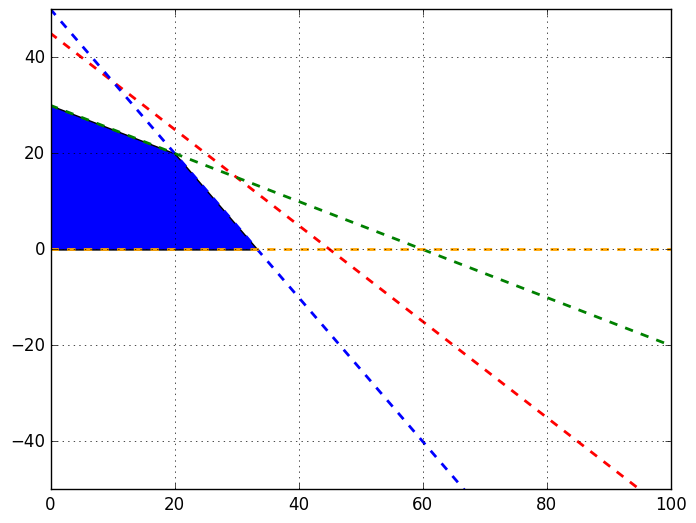

PyObject <matplotlib.collections.PolyCollection object at 0x7fc927f3b8d0>

In [11]:
using PyPlot
land_w = linspace(-10,1000,10000)
land_constraint_y = -(land_w - 45)
labor_constraint_y = -(3land_w - 100)/2
fert_constraint_y = -(2land_w - 120)/4
lower_bound_yw = 0*land_w
grid("on")
xlim(0,100)
ylim(-50,50)
plot(land_w, land_constraint_y, color="red", linewidth=2.0, linestyle="--")
plot(land_w, labor_constraint_y, color="blue", linewidth=2.0, linestyle="--")
plot(land_w, fert_constraint_y, color="green", linewidth=2.0, linestyle="--")
plot(land_w, lower_bound_yw, color="orange", linewidth=2.0, linestyle="--")
fill_between(land_w, lower_bound_yw, min(labor_constraint_y,fert_constraint_y),
    where=min(labor_constraint_y,fert_constraint_y) .>= lower_bound_yw)